In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


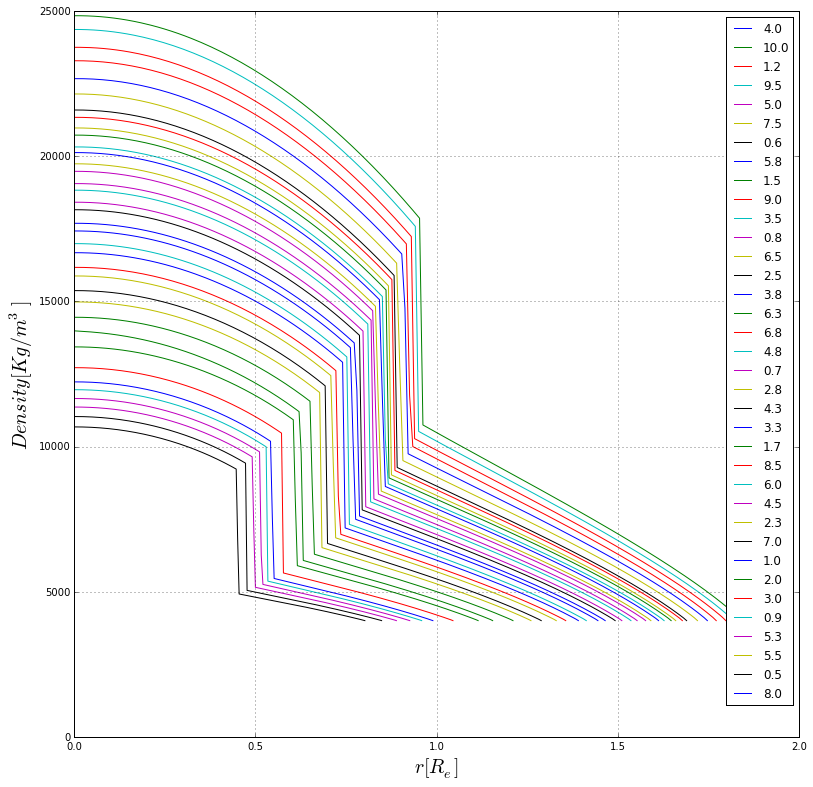

In [2]:
fileList=glob.glob('M*STRUC.dat')
data={}
masses=[]
fig=plt.figure(figsize=(13,13))
for f in fileList:
    mass=float(f.strip('-STRUC.dat').strip('M'))
    masses.append(mass)
    data[mass]=np.loadtxt(f)
    plt.plot(data[mass][:,1],data[mass][:,3],label=str(mass))
plt.legend(loc="upper right")
plt.grid()
plt.xlabel(r'$r[R_e]$',fontsize=20)
plt.ylabel(r'$Density[Kg/m^3]$',fontsize=20)
plt.show()

In [3]:
#Using the code given in the lectures
def LinearInterpolator( x, Xn, Yn ):
    
    #Sorting data, in case they are not
    Yn = Yn[np.argsort(Xn)]
    Xn = Xn[np.argsort(Xn)]
    
    #Detecting size of x
    try:
        Ninter = len(x)
    except:
        Ninter = 1
        x = np.array([x,])
        
    #Constructing function for each iteration
    term = lambda x, i: (Yn[i+1] - Yn[i])/(Xn[i+1] - Xn[i])*(x - Xn[i]) + Yn[i]
    
    #Detecting intervals for each x, [x_i, x_i+1] and interpolating
    y = []
    for n in xrange(Ninter):
        for i in xrange(len(Xn)):
            if x[n] <= Xn[i]:
                break
        y.append( term(x[n],i-1) )
    
    return np.array(y)

In [4]:
def DensityFunction( M, r ):
    Xn=data[float(M)][:,1]
    Yn=data[float(M)][:,3]
    return LinearInterpolator( r, Xn, Yn )

In [5]:
def Radius(rho, M,a=0,b=100,tol=1e-32):
    func=lambda r:DensityFunction(M,r)-rho
    #scipy handles the exceptions for f(a)*f(b)>0
    return optimize.bisect(func,a,b,xtol=1e-32)

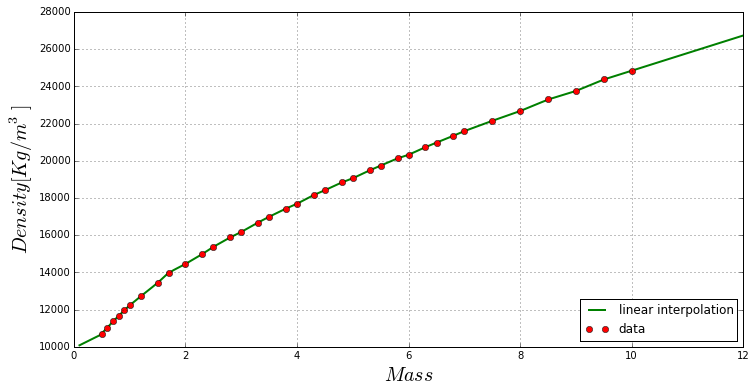

In [6]:
density=np.array([])
masses=np.array(masses)
for i in masses:
    density=np.append(density,data[float(i)][:,3][0])
x=np.linspace(0.1,12,100)
y=LinearInterpolator( x, masses,density )
plt.figure( figsize=(12,6) )
plt.plot( x, y, color="green", linewidth=2, label="linear interpolation" )
plt.plot( masses, density, "o", color="red", label="data" )
plt.legend(loc='lower right')
plt.grid()
plt.xlabel(r'$Mass$',fontsize=20)
plt.ylabel( r'$Density[Kg/m^3]$',fontsize=20)

In [7]:
mean_density=np.array([])
r_mean_rho=np.array([])
masses=np.array(masses)
for i in masses:
    rho=float(i)/((4./3.)*np.pi*np.power(data[float(i)][:,1][-1],3))
    mean_density=np.append(mean_density,rho)
    r_mean_rho=append(r_mean_rho,Radius(rho, i,a=0,b=100,tol=1e-32))

In [8]:
def MeanDensityLaw(r):
    return LinearInterpolator( r, r_mean_rho, mean_density )

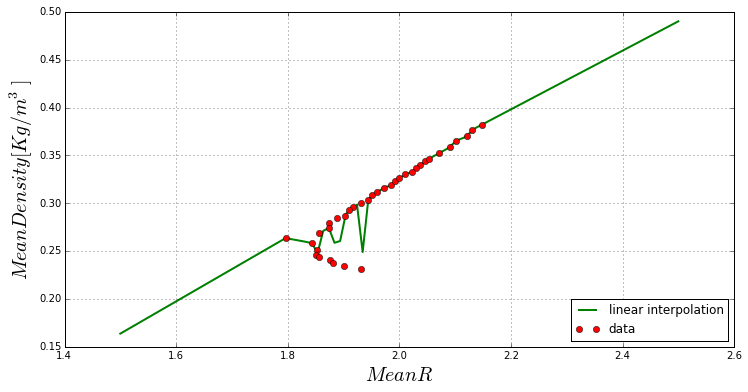

In [9]:
x=np.linspace(1.5,2.5,100)
y=MeanDensityLaw(x)
plt.figure( figsize=(12,6) )
plt.plot( x, y, color="green", linewidth=2, label="linear interpolation" )
plt.plot( r_mean_rho, mean_density, "o", color="red", label="data" )
plt.legend(loc='lower right')
plt.grid()
plt.xlabel(r'$Mean R$',fontsize=20)
plt.ylabel( r'$Mean Density[Kg/m^3]$',fontsize=20)